## Data validation and Explanatory data analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [5]:
# All data types fit the descriptuion
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [6]:
# No missing data. 6738 rows and 9 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [7]:
# NUMERIC DATA: presence of outliers in [price,	mileage,	tax,	mpg ] columns
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [8]:
# OBJECT DATA: details about the non numeric columns
df.describe(include=np.object)

<ipython-input-8-d1a16dadbdf6>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object)


,model,transmission,fuelType
count,6738,6738,6738
unique,18,4,4
top,Yaris,Manual,Petrol
freq,2122,3826,4087


##### Checking Model column

In [9]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<Axes: >

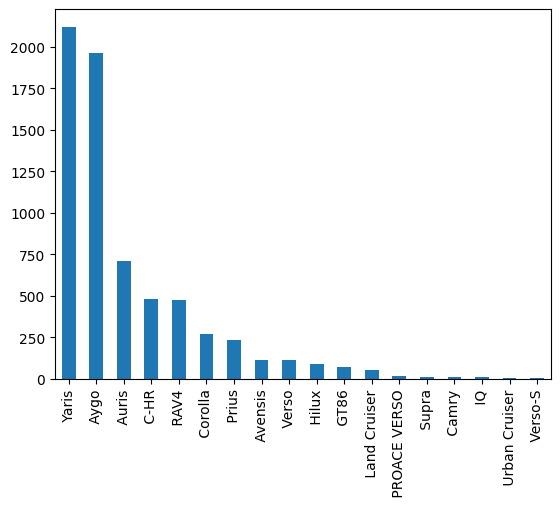

In [10]:
# Yaris is the most common model in the dataset with more than 2000 entries
df.model.value_counts().plot(kind="bar")

In [11]:
df.model.unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [12]:
df.model.nunique()

18

##### Checking Year column

In [13]:
df.year.unique()

array([2016, 2017, 2015, 2020, 2013, 2019, 2018, 2014, 2012, 2005, 2003,
       2004, 2001, 2008, 2007, 2010, 2011, 2006, 2009, 2002, 1999, 2000,
       1998])

In [14]:
df.year.value_counts()

2017    2019
2019    1286
2018    1015
2016     997
2015     525
2014     352
2013     204
2020     128
2012      42
2011      40
2009      29
2007      20
2008      19
2010      18
2005      12
2006      11
2004       7
2003       6
2002       4
2001       1
1999       1
2000       1
1998       1
Name: year, dtype: int64

In [15]:
df.year.nunique()

23

<Axes: >

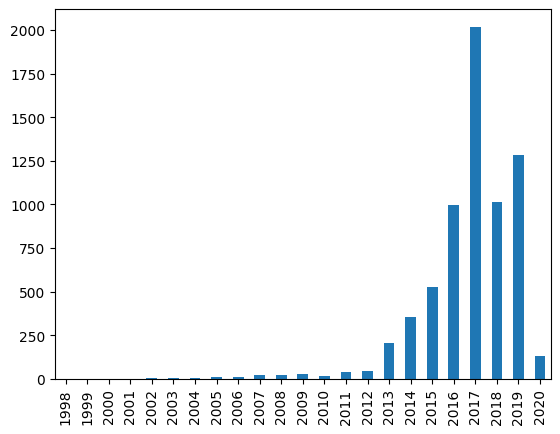

In [16]:
df.year.value_counts(ascending=True).sort_index().plot(kind="bar")
# years column spans 23 years, from 1998 to 2020. Year 2017 is the most common year of registration

#### Checking Price column

In [17]:
# Price is a contiuous value, so i will chage data type from Integer to Float
df["price"] = df["price"].astype('float')

In [18]:
price_mean = df["price"].mean()
price_median = df["price"].median()
print(price_mean, price_median)

12522.3910655981 10795.0


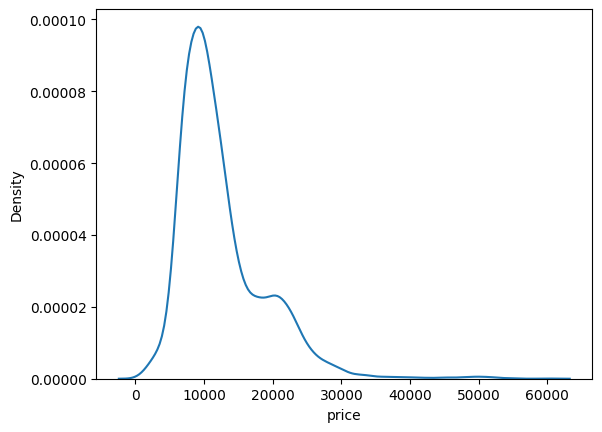

In [19]:
sns.kdeplot(df["price"])
plt.show()

##### Checking transmission column

In [20]:
df.transmission.value_counts()

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

In [21]:
df.transmission.value_counts(normalize=True)

Manual       0.567824
Automatic    0.394331
Semi-Auto    0.037697
Other        0.000148
Name: transmission, dtype: float64

<Axes: >

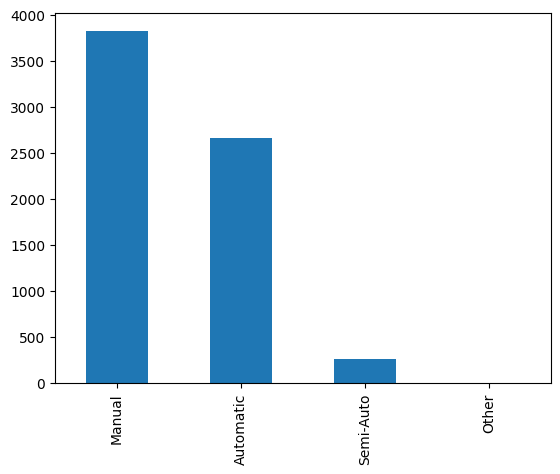

In [22]:
# Manual is the most common type of transmission. Other type should be dropped or replaced due to insigification and dimensionality reduction after one hot encoding
df.transmission.sort_values().value_counts().plot(kind="bar")

In [23]:
df.transmission = df.transmission.str.replace('Other', 'Manual')
df.transmission.value_counts()

Manual       3827
Automatic    2657
Semi-Auto     254
Name: transmission, dtype: int64

##### Checking mileage column

In [24]:
df.mileage.describe()

count      6738.000000
mean      22857.413921
std       19125.464147
min           2.000000
25%        9446.000000
50%       18513.000000
75%       31063.750000
max      174419.000000
Name: mileage, dtype: float64

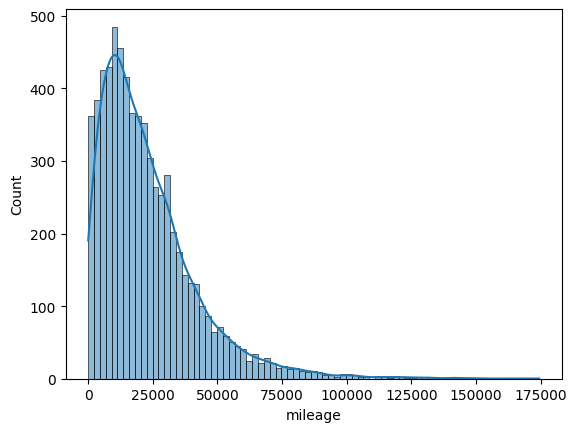

In [25]:
# Data skewed to the right
sns.histplot(df["mileage"], kde=True)
plt.show()

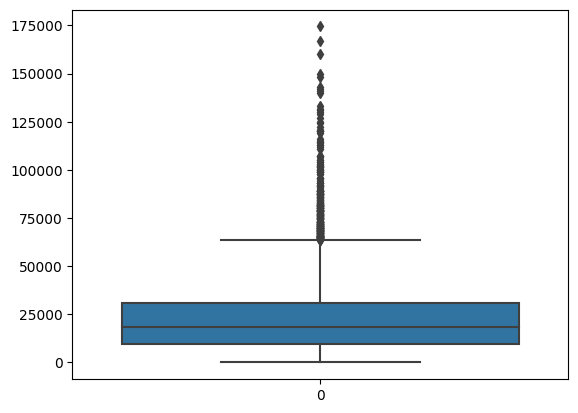

In [26]:
# Presence of outliers
sns.boxplot(df["mileage"])
plt.show()

##### Checking fuelType column

In [27]:
df.fuelType.value_counts()

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

In [28]:
# Petrom is the most common fuel type
df.fuelType.value_counts(normalize="True") * 100.

Petrol    60.655981
Hybrid    30.320570
Diesel     7.465123
Other      1.558326
Name: fuelType, dtype: float64

<Axes: >

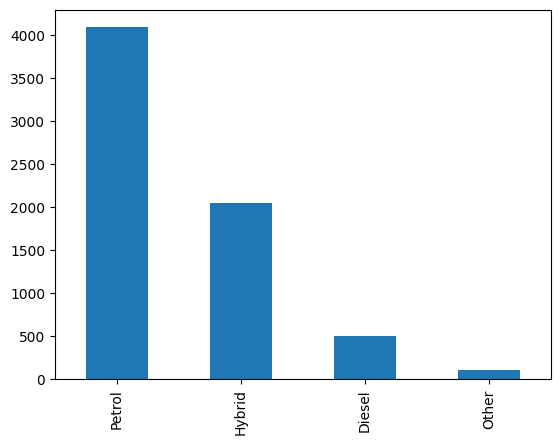

In [29]:
df.fuelType.sort_values().value_counts().plot(kind="bar")

##### Checking Tax column

In [30]:
df.tax.describe()

count    6738.000000
mean       94.697240
std        73.880776
min         0.000000
25%         0.000000
50%       135.000000
75%       145.000000
max       565.000000
Name: tax, dtype: float64

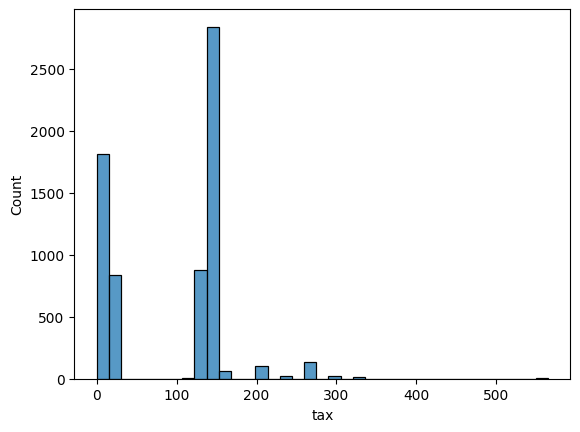

In [31]:
sns.histplot(df["tax"])
plt.show()

In [32]:
df.tax.value_counts()

145    2090
0      1790
135     678
30      587
150     529
20      253
140     223
125     196
260      93
200      74
265      41
160      41
205      28
165      23
10       23
235      21
300      16
325      13
240       5
330       4
305       2
250       1
120       1
155       1
115       1
190       1
565       1
555       1
540       1
Name: tax, dtype: int64

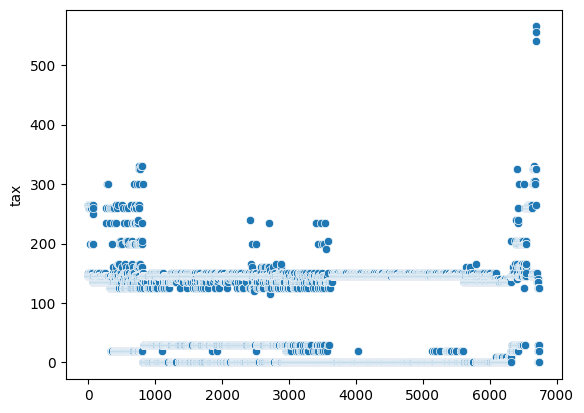

In [33]:
sns.scatterplot(df["tax"])
plt.show()

<Axes: >

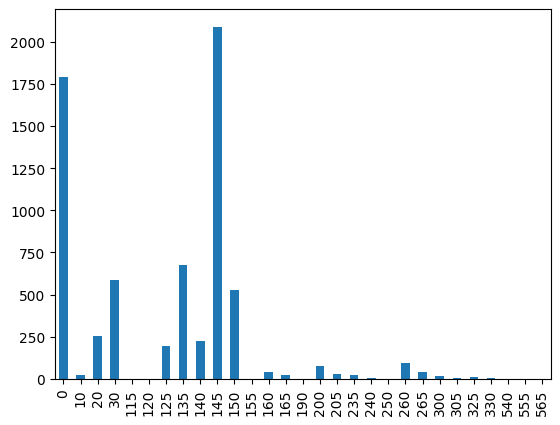

In [34]:
df.tax.value_counts().sort_index().plot(kind="bar")

##### Checking mpg column

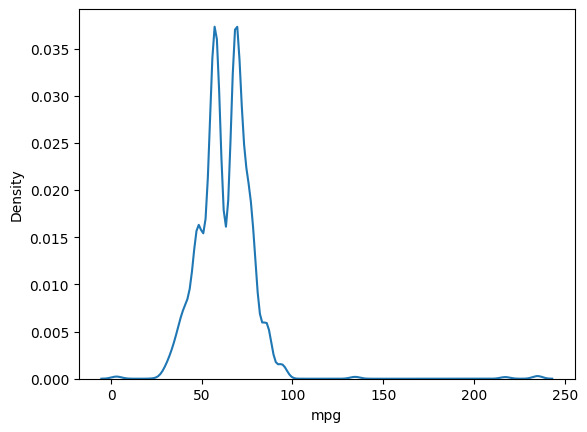

In [35]:
sns.kdeplot(df["mpg"])
plt.show()

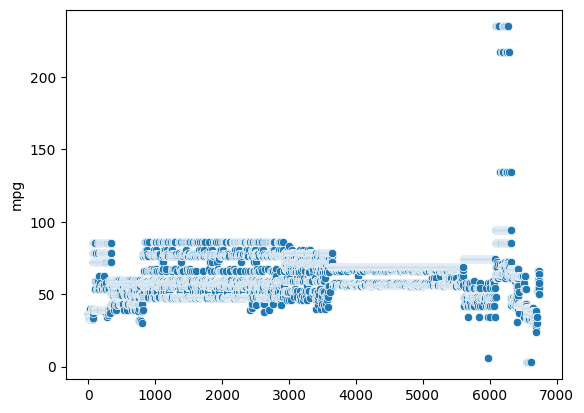

In [36]:
sns.scatterplot(df["mpg"])
plt.show()

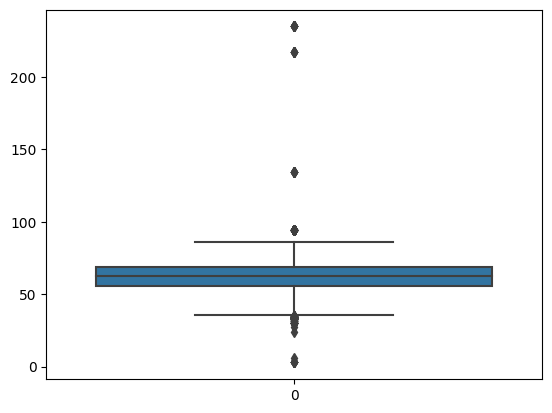

In [37]:
sns.boxplot(df["mpg"])
plt.show()

##### Checking engineSize column

In [38]:
df.engineSize.value_counts()

1.0    2059
1.5    1423
1.8    1289
1.3     601
2.0     398
1.2     303
2.5     249
1.6     169
2.4      70
2.2      58
1.4      40
2.8      36
3.0      35
0.0       6
4.2       1
4.5       1
Name: engineSize, dtype: int64

In [39]:
df.engineSize.value_counts(normalize=True) * 100.

1.0    30.558029
1.5    21.119026
1.8    19.130306
1.3     8.919561
2.0     5.906797
1.2     4.496883
2.5     3.695459
1.6     2.508163
2.4     1.038884
2.2     0.860790
1.4     0.593648
2.8     0.534283
3.0     0.519442
0.0     0.089047
4.2     0.014841
4.5     0.014841
Name: engineSize, dtype: float64

<Axes: >

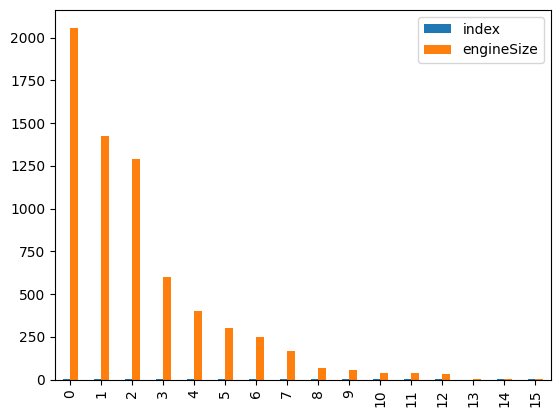

In [40]:
df.engineSize.value_counts().reset_index().plot(kind="bar")

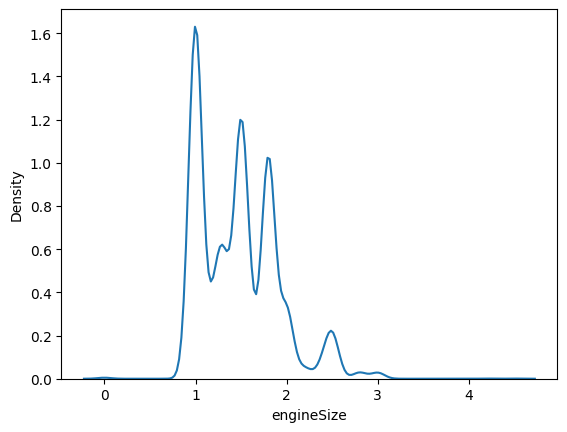

In [41]:
sns.kdeplot(df["engineSize"])
plt.show()

## Data Visualization

#### Uncovering correlations within the dataset

<ipython-input-42-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


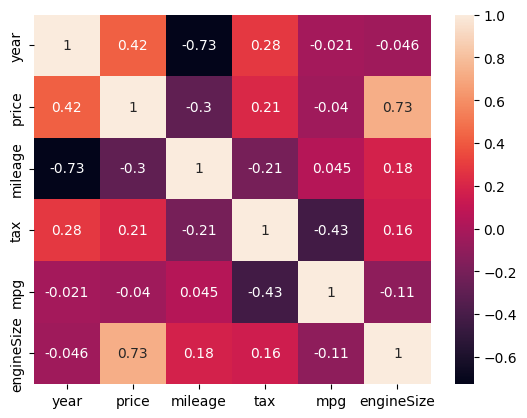

In [42]:
sns.heatmap(df.corr(), annot=True)
plt.show()

<ipython-input-43-7703670c0e90>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


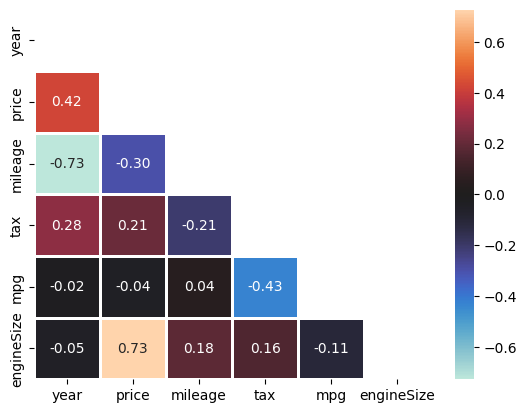

In [43]:
# Create the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()


#### Price and enginesize are strongly correlated while year and mileage are negatively correlated

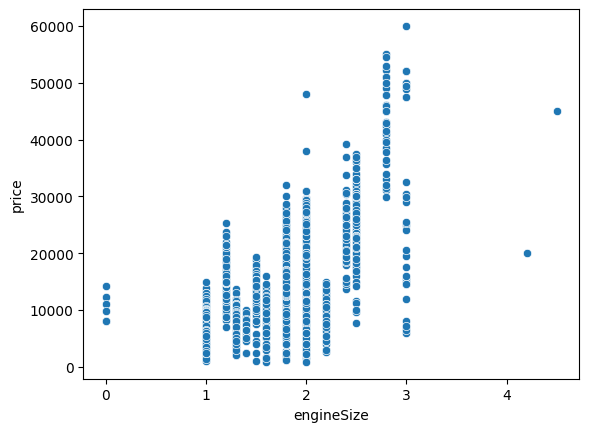

In [44]:
sns.scatterplot(data=df, x="engineSize", y="price")
plt.show()

#### The strong negative correlation between year and mileage, is because new vehicles usually have lower mileage than older vehicles.

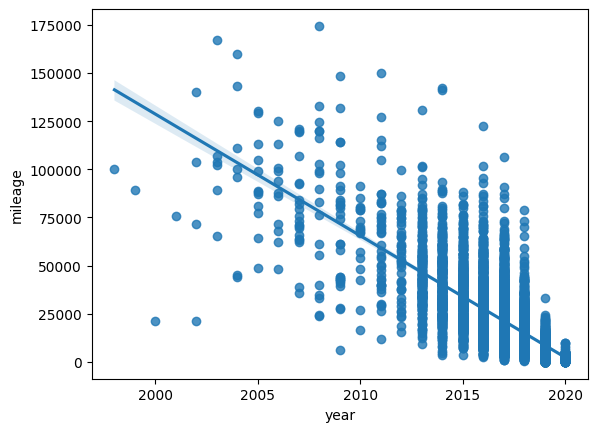

In [45]:
sns.regplot(data=df, x="year", y="mileage")
plt.show()

#### Dealing with outliers:
Some columns in the data contain outliers which is leading to skewness in the data.
There are two approach to dealing with outliers:
- first dropping outliers entirely and risk losing information.
- replace outliers with NaN values before imputing them on the mean.
This will depend on the number of outlier values and the percentage of the data they represent.

## Machine Learning Model Development including:
##### What type of problem this is ?
This is a regression problem, since ze are trying to build a model that will predict a continuous variable. In this case, Price is the target variable.

#### Next step is to prepare the data so it meets Sci-kit learn API requirements before feeding the processed data into our models

#### Dealing with outliers

In [46]:
# Number of rows  in the original dataframe
df.shape[0]

6738

<Axes: >

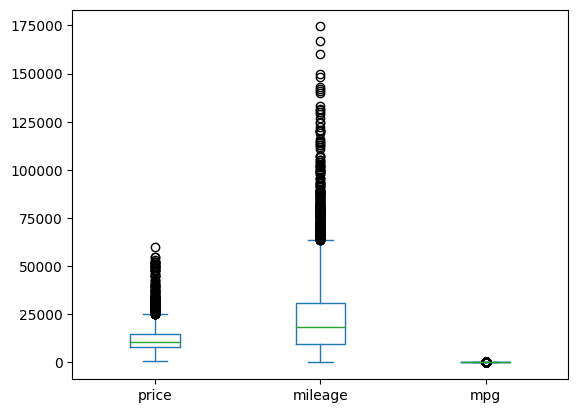

In [47]:
# Columns that seem to contain outlier values
cols = ["price", "mileage", "mpg"]
df[cols].plot(kind='box')

#### I will drop the outlier values and see how much data i will lose

In [48]:
def remove_outliers(df, cols):
    # Copy the original DataFrame to avoid modifying it
    df_copy = df.copy()
    
    # Loop through each column and remove outliers using the IQR method
    for col in cols:
        q1 = df_copy[col].quantile(0.25)
        q3 = df_copy[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]
    
    # Return the DataFrame without outliers
    return df_copy

#### After dropping outliers we lost 640 rows which is 10 percent of the original data set.
##### P.S: Might change the approach later.

In [49]:
df_trimmed = remove_outliers(df, cols)
df_trimmed.shape[0]

6098

In [50]:
df_trimmed.describe()

,year,price,mileage,tax,mpg,engineSize
count,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000
mean,2016.884716,11836.581666,20748.366186,91.597245,63.075139,1.418252
std,1.748870,4793.741674,14116.573848,70.802348,11.338927,0.391500
min,2000.000000,2490.000000,2.000000,0.000000,36.200000,0.000000
25%,2016.000000,8295.000000,9677.000000,0.000000,56.500000,1.000000
50%,2017.000000,10500.500000,18111.500000,135.000000,65.600000,1.500000
75%,2018.000000,13995.000000,29621.500000,145.000000,69.000000,1.800000
max,2020.000000,25000.000000,63652.000000,300.000000,86.000000,3.000000


<Axes: >

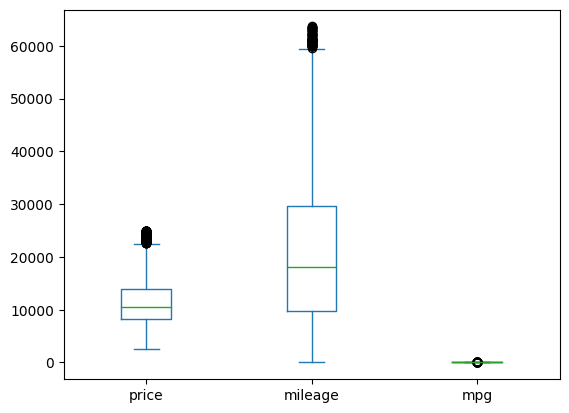

In [51]:
cols = ["price", "mileage", "mpg"]
df_trimmed[cols].plot(kind='box')

In [52]:
df = df_trimmed

#### Features Engineering

In [53]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000.0,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995.0,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998.0,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998.0,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498.0,Manual,36284,Petrol,145,36.2,2.0


#### I'm going to label the category variables using get_dummies without considering reducing model dimentions just yet

In [54]:
model_label = pd.get_dummies(df["model"], drop_first=True)
model_label.head()

,Avensis,Aygo,C-HR,Camry,Corolla,GT86,Hilux,IQ,PROACE VERSO,Prius,RAV4,Urban Cruiser,Verso,Verso-S,Yaris
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [55]:
year_label = pd.get_dummies(df["year"], drop_first=True)
year_label.head()

,2002,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
trans_label = pd.get_dummies(df["transmission"], drop_first=True)
trans_label.head()

,Manual,Semi-Auto
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [57]:
fuel_label = pd.get_dummies(df["fuelType"], drop_first=True)
fuel_label.head()

,Hybrid,Other,Petrol
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [58]:
num_df = df.drop(["model", "year", "transmission", "fuelType"], axis=1)
num_df.head()

,price,mileage,tax,mpg,engineSize
0,16000.0,24089,265,36.2,2.0
1,15995.0,18615,145,36.2,2.0
2,13998.0,27469,265,36.2,2.0
3,18998.0,14736,150,36.2,2.0
4,17498.0,36284,145,36.2,2.0


#### Putting the columns together to create a new data frame

In [59]:
ml_df = pd.concat([num_df, fuel_label, trans_label, year_label, model_label], axis=1)
ml_df.head()

,price,mileage,tax,mpg,engineSize,Hybrid,Other,Petrol,Manual,Semi-Auto,...,GT86,Hilux,IQ,PROACE VERSO,Prius,RAV4,Urban Cruiser,Verso,Verso-S,Yaris
0,16000.0,24089,265,36.2,2.0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,15995.0,18615,145,36.2,2.0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,13998.0,27469,265,36.2,2.0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,18998.0,14736,150,36.2,2.0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,17498.0,36284,145,36.2,2.0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [60]:
print(ml_df.shape)

(6098, 42)


#### Defining the Features as X and target as y

In [61]:
X = ml_df.drop('price', axis=1)
y = ml_df["price"]
print(X.shape, y.shape)

(6098, 41) (6098,)


#### Time to split the data into training and test sets to avoid over fitting and evaluate model performance on unseen data

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.size, X_test.size, y_train.size, y_test.size)

187493 62525 4573 1525


In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Tree Model

In [64]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [65]:
X.columns = X.columns.astype(str)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

## First Attempt with DecisionTreeRegressor

Best hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': None, 'max_depth': 14, 'ccp_alpha': 0.01}
Cross-validation RMSE: 1625292.8482717762
Training set RMSE: 1226.7635035657663
Training score: 0.9551066366503848


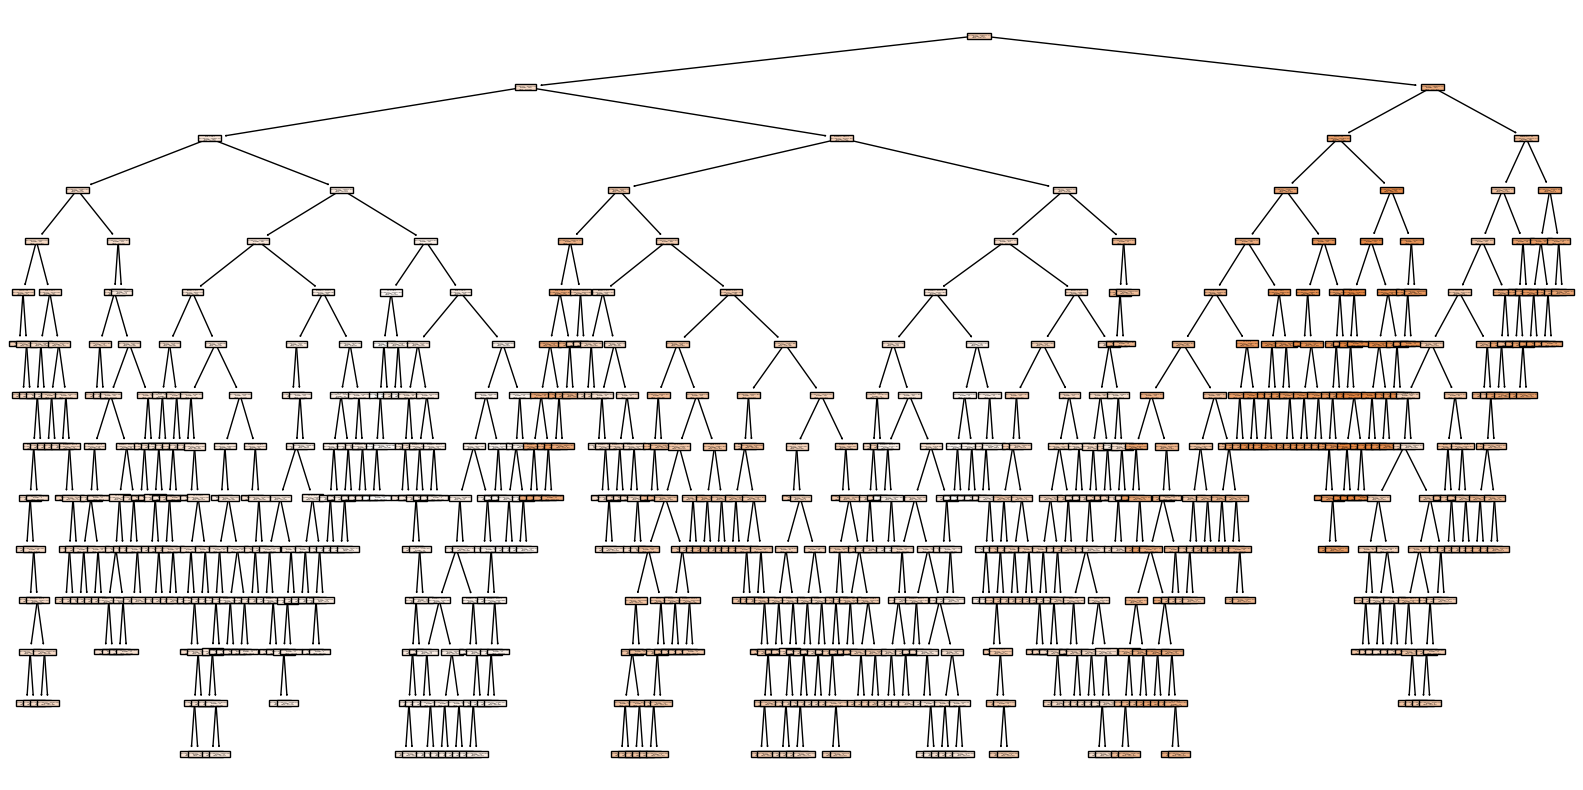

In [78]:
# Setting random seed
np.random.seed(402)

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': range(1, 20),
              'min_samples_split': range(2, 20),
              'min_samples_leaf': range(1, 10),
              'max_features': ['sqrt', 'log2', None],
              'ccp_alpha': [0, 0.01, 0.05, 0.1]}

# Create a DecisionTreeRegressor object
dtr = DecisionTreeRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = RandomizedSearchCV(dtr, param_grid, cv=5, error_score='raise', scoring='neg_mean_squared_error', random_state=42)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Train the model with the best hyperparameters
best_dtr = grid_search.best_estimator_

# Use cross-validation to evaluate the model performance
cv_scores = -1 * cross_val_score(best_dtr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('Cross-validation RMSE:', cv_scores.mean())

# Use the trained model to make predictions
y_pred = best_dtr.predict(X_test)

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Training set RMSE:', rmse)

# calculate the score of the training set
score = best_dtr.score(X_train, y_train)
print('Training score:', score)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(best_dtr, filled=True, feature_names=X_train.columns)
plt.show()

# An Improved DecisionTreeRegresso model
After Scaling the data then applying PCA and adding more options for hypertunning the model improved slightly.

In [67]:
# Setting random seed
np.random.seed(402)

# Define the parameter grid for hyperparameter tuning
param_grid = {'dtr__max_depth': range(1, 20),
              'dtr__min_samples_split': range(2, 20),
              'dtr__min_samples_leaf': range(1, 10),
              'dtr__max_features': ['sqrt', 'log2', None],
              'dtr__ccp_alpha': [0, 0.01, 0.05, 0.1]}

# Create a DecisionTreeRegressor object
dtr = DecisionTreeRegressor(random_state=42)

# PCA
pca = PCA()

# Defining pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca), ('dtr', dtr)])

# Use GridSearchCV to find the best hyperparameters
grid_search = RandomizedSearchCV(pipe, param_grid, cv=5, error_score='raise', scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Train the model with the best hyperparameters
best_dtr = grid_search.best_estimator_

# Use cross-validation to evaluate the model performance
cv_scores = -1 * cross_val_score(best_dtr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('Cross-validation RMSE:', cv_scores.mean())

# Use the trained model to make predictions
y_pred = best_dtr.predict(X_test)

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Training set RMSE:', rmse)

# calculate the score of the training set
score = best_dtr.score(X_train, y_train)
print('Training score:', score)

Best hyperparameters: {'dtr__min_samples_split': 12, 'dtr__min_samples_leaf': 8, 'dtr__max_features': None, 'dtr__max_depth': 19, 'dtr__ccp_alpha': 0.01}
Cross-validation RMSE: 1956473.8096429494
Training set RMSE: 1222.0464339435746
Training score: 0.9702242645010375


#### First Attempt at Gradiant boost Regressor

In [70]:
X.columns = X.columns.astype(str)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [72]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint as sp_randint


In [83]:
# Define the parameter distributions for hyperparameter tuning
param_dist = {'n_estimators': sp_randint(50, 500),
              'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
              'max_depth': sp_randint(3, 10),
              'min_samples_split': sp_randint(2, 10),
              'min_samples_leaf': sp_randint(1, 5),
              'max_features': ['sqrt', 'log2', None]}

# Create a GradientBoostingRegressor object
gbr = GradientBoostingRegressor(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(gbr, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# Train the model with the best hyperparameters
best_gbr_ = random_search.best_estimator_

# Use cross-validation to evaluate the model performance
cv_scores = -1 * cross_val_score(best_gbr_, X_train, y_train, cv=10, scoring='neg_mean_squared_error', verbose=1)
print('Cross-validation RMSE:', cv_scores.mean())

# Use the trained model to make predictions
y_pred = best_gbr_.predict(X_test)

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Training set RMSE:', rmse)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 280}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross-validation RMSE: 965869.7740605738
Training set RMSE: 936.3211575851839


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.0s finished


In [76]:
best_gbr_.score(X_train, y_train)

0.972165681364201

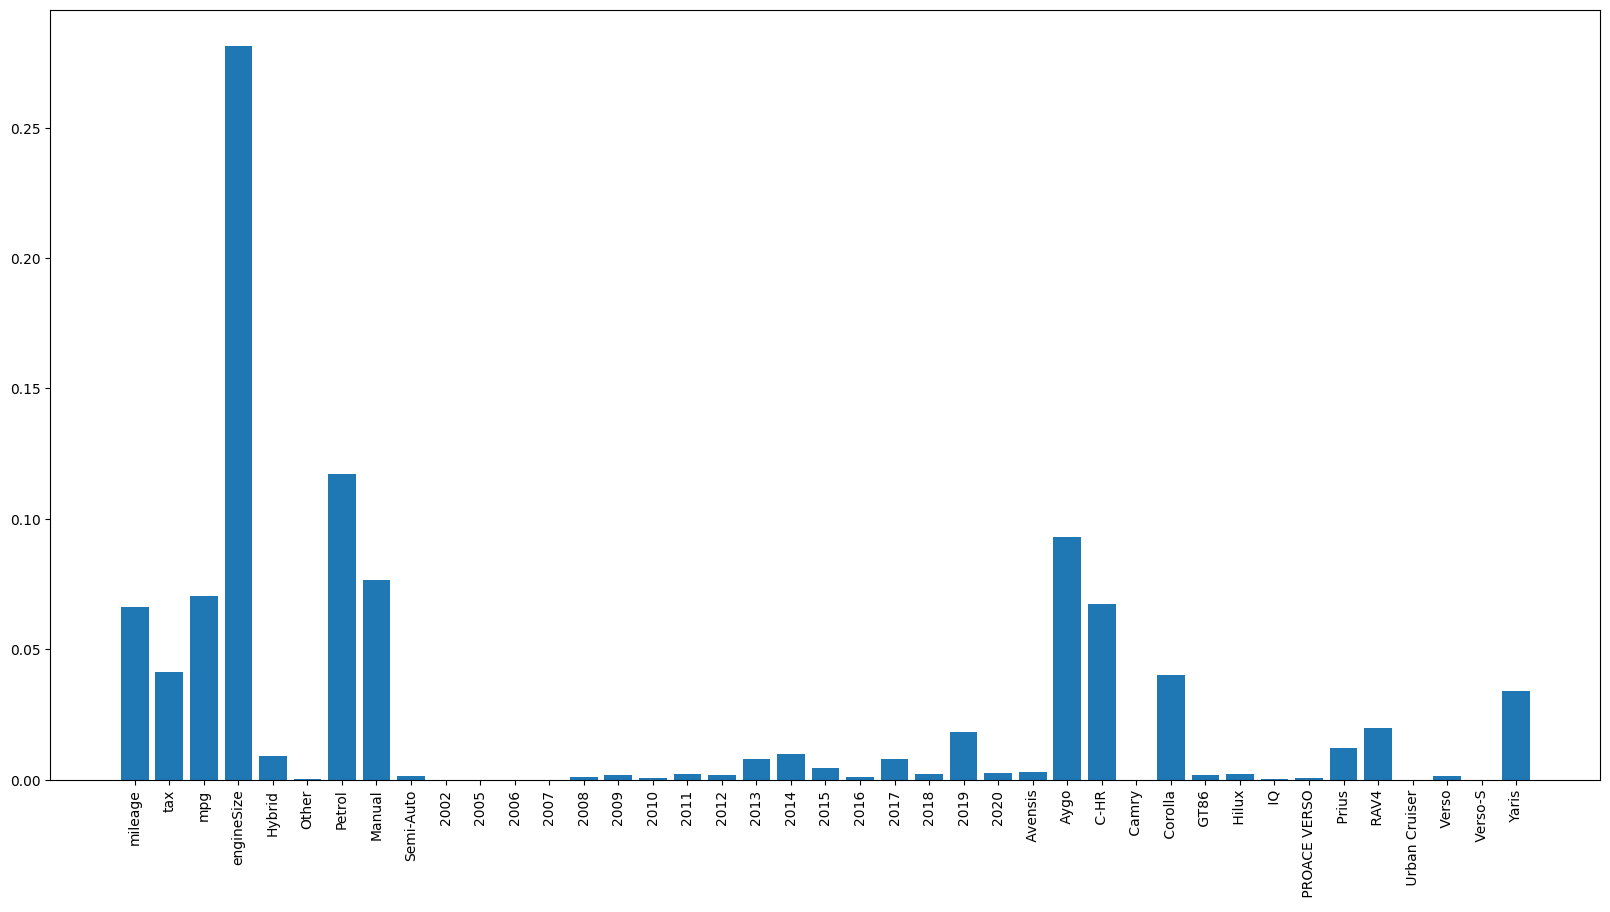

In [84]:
plt.figure(figsize=(20, 10))
# Plot feature importances
feature_importances = best_gbr_.feature_importances_
plt.bar(X_train.columns, feature_importances)
plt.xticks(rotation=90)
plt.show()

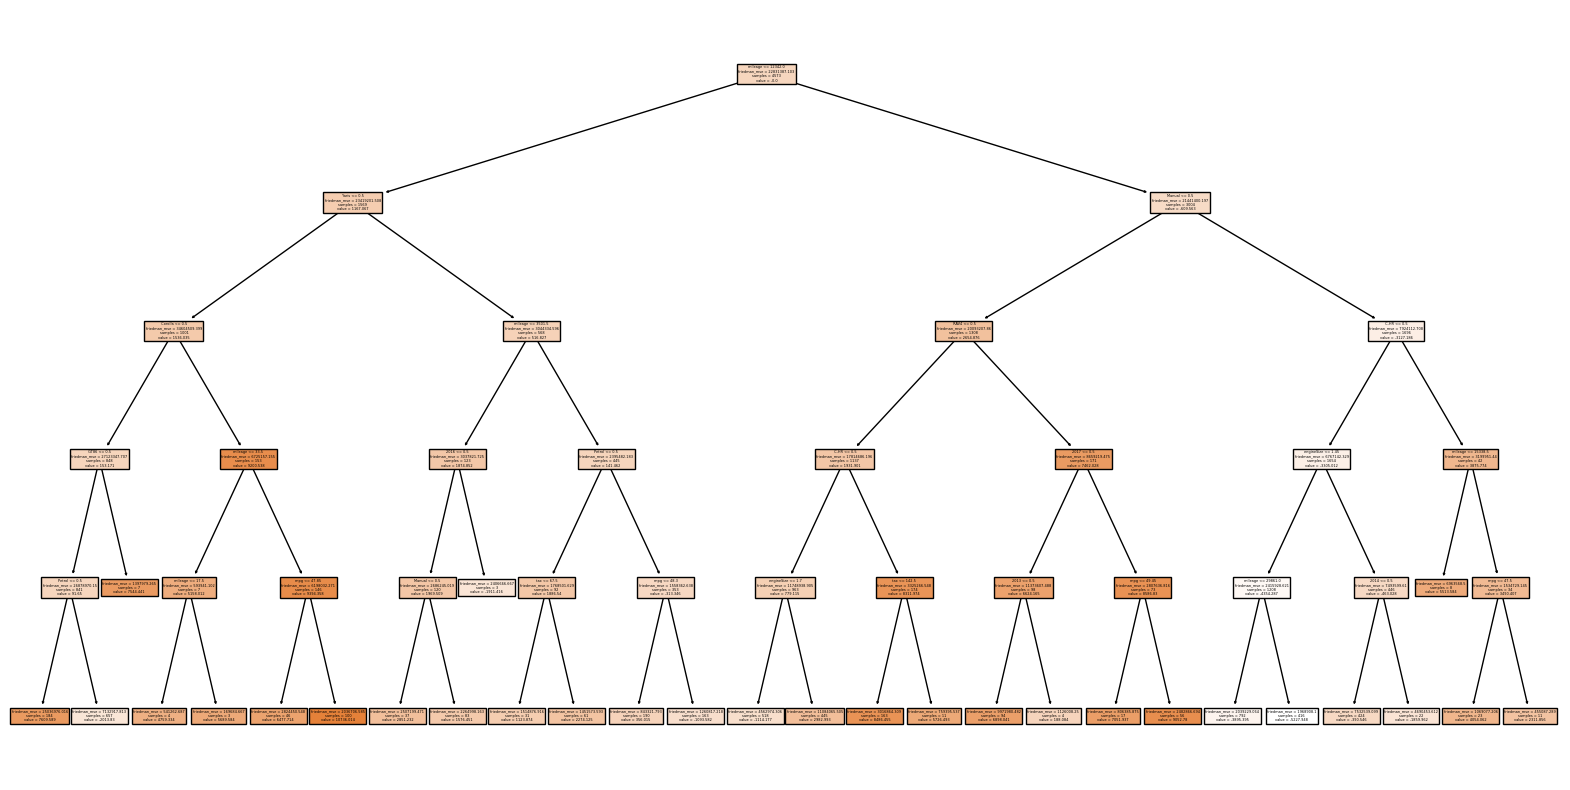

In [85]:
# Plot the first decision tree in the ensemble
plt.figure(figsize=(20, 10))
plot_tree(best_gbr_.estimators_[0, 0], filled=True, feature_names=X_train.columns)
plt.show()


# TEST
This model took too long to run

In [81]:
# SETTING A SEED
np.random.seed(42)

# Define the parameter distributions for hyperparameter tuning
param_dist = {'gbr__n_estimators': sp_randint(50, 500),
              'gbr__learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
              'gbr__max_depth': sp_randint(3, 10),
              'gbr__min_samples_split': sp_randint(2, 10),
              'gbr__min_samples_leaf': sp_randint(1, 5),
              'gbr__max_features': ['sqrt', 'log2', None]}

# Create a GradientBoostingRegressor object
gbr = GradientBoostingRegressor(random_state=42)

# PCA
pca = PCA()

# Defining pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca), ('gbr', gbr)])

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# Train the model with the best hyperparameters
best_gbr = random_search.best_estimator_

# Use cross-validation to evaluate the model performance
cv_scores = -1 * cross_val_score(best_gbr, X_train, y_train, cv=10, scoring='neg_mean_squared_error', verbose=1)
print('Cross-validation RMSE:', cv_scores.mean())

# Use the trained model to make predictions
y_pred = best_gbr.predict(X_test)

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Training set RMSE:', rmse)

# score
print('gbr score:', best_gbr.score(X_train, y_train))

Best hyperparameters: {'gbr__learning_rate': 0.1, 'gbr__max_depth': 5, 'gbr__max_features': 'sqrt', 'gbr__min_samples_leaf': 3, 'gbr__min_samples_split': 6, 'gbr__n_estimators': 280}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross-validation RMSE: 1143259.555483524
Training set RMSE: 987.0150172044772
gbr score: 0.9829294704150886


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   47.9s finished


# TEST

## Conclusion:
#### The GradientBoostingRegressor model performed better than the DecisionTreeRegressor model by a differece of -327.1 RMSE.
#### compare Model RMSE to the mean or median of your target variable (Price): A good rule of thumb is to compare the RMSE to the mean or median value of your target variable. If the RMSE is smaller than the mean or median, it may be considered a good fit.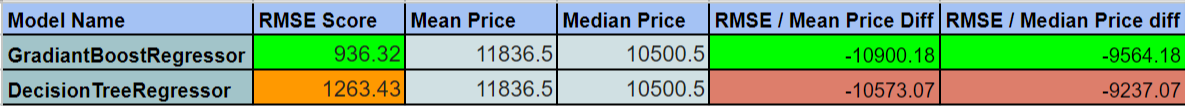

#### As you can see the GradiantBoostRegressor RMSE is much smaller than the Mean and Median value of the target Variable. So it is safe to assume it is the better model here.

## Further Considerations:
#### 1. The model contains a lot of dimensions with low to no added value to model accuracy. Those features if removed, would reduce model complexity and increase model effiecency.
#### 2. Try out different regularization methods besides the StandardScaler.
#### 3. Instead of removing Outliers try to impute them using the mean or median value.
#### 4. Try different approaches like RandomForestRegressor, Votting and Bagging Ensemble methods.
